<h1>Содержание<span class="tocSkip"></span></h1>


<div class="toc"><ul class="toc-item"><li> <span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a>
</span></li><li> <a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a>
    <ul class="toc-item"><li><span><a href="#Пропуски-значений-и-типы-данных" data-toc-modified-id="Пропуски-значений-и-типы-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Пропуски значений и типы данных</a>
        </span></li><li><a href="#Дубликаты" data-toc-modified-id="Дубликаты-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Дубликаты</a>
        </span></li><li><a href="#Поиск-аномальных-значений" data-toc-modified-id="Поиск-аномальных-значений-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Поиск аномальных значений</a>
    </span></li><li><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a>
</span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a>
    <ul class="toc-item"><li><span><a href="#Виды-объектов-общественного-питания" data-toc-modified-id="Виды-объектов-общественного-питания-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Виды объектов общественного питания</a>
        </span></li><li><a href="#Сетевые-и-несетевые-заведения-Москвы" data-toc-modified-id="Сетевые-и-несетевые-заведения-Москвы-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Сетевые и несетевые заведения Москвы</a>
        </li><li><a href="#Влияние-размера-сети-общественного-питания-на-среднюю-вместительность-заведения" data-toc-modified-id="Влияние-размера-сети-общественного-питания-на-среднюю-вместительность-заведения-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Влияние размера сети общественного питания на среднюю вместительность заведения</a>
        </li><li><a href="#Исследование-вместимости-заведений-общественного-питания-по-типам-объектов" data-toc-modified-id="Исследование-вместимости-заведений-общественного-питания-по-типам-объектов-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Исследование вместимости заведений общественного питания по типам объектов</a>
        </li><li><a href="#Топ-10-улиц-по-количеству-объектов-общественного-питания" data-toc-modified-id="Топ-10-улиц-по-количеству-объектов-общественного-питания-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Топ-10 улиц по количеству объектов общественного питания</a> 
</span></li><li> <a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a>

# Исследование рынка заведений общественного питания Москвы

Решено открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Инвесторов интересует текущее положение дел на рынке — сможет ли данный проект снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Чтобы ответить на этот вопрос необходимо подготовить исследование рынка. У нас есть открытые данные о заведениях общественного питания в Москве.

## Изучение данных из файла

Импортируем необходимые для работы библиотеки.
Просмотрим таблицу с данными, оценим ее содержание.

In [1]:
import pandas as pd                                                    # импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from io import BytesIO
import requests

In [2]:
warnings.filterwarnings("ignore")

In [3]:
sns.set_palette('husl') # зададим палитру для всех графиков

In [4]:
try:                                                                   # чтение файла с данными и сохранение в df
    df = pd.read_csv('./datasets/rest_data.csv')
except FileNotFoundError:
    spreadsheet_id = '1WrU4TjC-z2Xmp6AtN-HyteO4-Tr8aqyW'
    file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=xlsx'.format(spreadsheet_id)
    r = requests.get(file_name)
    df = pd.read_excel(BytesIO(r.content))
    

In [5]:
df

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [7]:
df.describe()

,id,number
count,15366.000000,15366.000000
mean,119720.066901,59.547182
std,73036.130732,74.736833
min,838.000000,0.000000
25%,28524.000000,12.000000
50%,144974.500000,40.000000
75%,184262.250000,80.000000
max,223439.000000,1700.000000


Итак, в таблице шесть столбцов. Столбцы содержат типы данных — `object`, `int`.

Наименования столбцов оформлены в соответствии с хорошим стилем.

Согласно документации к данным:
* `id` — идентификатор объекта;
* `object_name` — название объекта общественного питания;
* `chain` — сетевой ресторан;
* `object_type` — тип объекта общественного питания;
* `address` — адрес;
* `number` — количество посадочных мест.


**Вывод**

В каждой строке таблицы - данные о заведениях общественного питания Москвы. Часть столбцов содержат категориальные значения, которые описывают объект, и связанные с ним параметры - идентификатор объекта, его название, тип объекта общественного питания, адрес по которому он расположен. Столбец `number` содержит количественные значения. Значения в столбце `chain` можно считать булевым значением, так как отвечает на вопрос является ли заведение общественного питания сетевым. 

Перед тем как приступить к анализу данных, необходимо изучить встречаются ли пропуски в данных, а так же аномальные значения, явные и неявные дубликаты, несоответствие типов данных. При дальнейшем анализе без устранения проблем в данных, результаты исследования будут искажены. А так же могут возникать ошибки при расчетах основных показателей, необходимых для решения кейса.

Чтобы двигаться дальше нужно устранить проблемы в данных.

## Предобработка данных

Определим и изучим пропущенные значения. Приведем данные к нужным типам.

### Пропуски значений и типы данных
Посчитаем количество пропущенных значений в таблице:

In [8]:
df.isna().sum() # подсчёт пропусков

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Итак, пропусков в таблице не имеется. Но вернувшись к просмотру типов данных, можно предложить их замену в столбцах `id` и`chain` на более подходящие.

In [10]:
df.chain.replace({'да':True,'нет':False})
df.chain.eq('да')

0        False
1        False
2        False
3         True
4        False
         ...  
15361     True
15362     True
15363     True
15364     True
15365     True
Name: chain, Length: 15366, dtype: bool

In [11]:
df.loc[df['chain'] == 'да', 'chain'] = True                        # произведем замену на булево значение True

In [12]:
df.loc[df['chain'] == 'нет', 'chain'] = False                      # произведем замену на булево значение False

In [13]:
df['chain'] = df['chain'].astype(bool, errors='ignore')            # изменим тип данных на Boolean (логический тип данных)

In [14]:
df['id'] = df['id'].astype(object)                                 # изменим тип данных для идентификатора объекта

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  object
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  bool  
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: bool(1), int64(1), object(4)
memory usage: 615.4+ KB


Данные приведены к нужным типам. Пропусков в таблице не имеется.

### Дубликаты

Посчитаем явные дубликаты в таблице:

In [16]:
df.duplicated().sum() # подсчёт явных дубликатов

0

Явных дубликатов в таблице не найдено, значит нет абсолютно идентичных объектов - повторы и задвоения данных исключены.

Теперь необходимо оценить имеются ли в таблице неявные дубликаты. Сделать это можно в столбцах с категориальными значениями.

In [17]:
pd.set_option('max_colwidth', 500) # установим максимальную ширину столбца на выходном дисплее, чтобы оценить вывод ниже

In [18]:
def unique(row):
    return row.sort_values().unique()

In [19]:
try:
    print(df.drop(['id',
             'number'],
            axis=1).apply(unique)) # исключим значения столбцов с количественными переменными
except:
    print('Код не выполнен')

object_name    [1-ЫЙ МОСКОВСКИЙ КАДЕТСКИЙ КОРПУС, 1-й МОК, 100 личная столовая, 100 личное кафе, 1001 ночь, 100лоФФка, 101 вкус, 13 RULES, 13 RULES KRAFT BEER, 13 Rules, 15 Kitchen+bar, 18 АВТОБУСНЫЙ ПАРК, 19bar Atmosphere, 1x bet, 2-Й АВТОБУСНЫЙ ПАРК, 23'00, 24 Градуса, 259, 3 Skovorodki, 3 правила, 33 пингвина, 37-37, 44 Чашма, 495, 5звезд Юг 52, 68. ПАУЗА, 69 Pints Бар, 69 pints, 7 Сендвичей, 7 злаков, 7 сэндвичей-Meating, 7717 LOUNGE (Кальянная), 8 OZ Унций, 8-ОЙ ТРОЛЛЕЙБУСНЫЙ ПАРК, 9 АВТОБУСНЫЙ ПАРК, ...
chain                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

Дубликатов в столбце `object_type` не обнаружено. Адреса и наименования заведений имеют большой набор значений, проверить визуально на неявные дубликаты будет проблематично.

### Поиск аномальных значений
Просмотрим столбец `number` c количественными значениями. В разделе изучения данных при вызове описания таблицы мы могли наблюдать аномально высокие значения числа посадочных мест - 1700 единиц. А так же увидели заведения с отсутствием посадочных мест. Изучим эти объекты подробнее. 

Для начала поймем как много у нас аномальных значений.

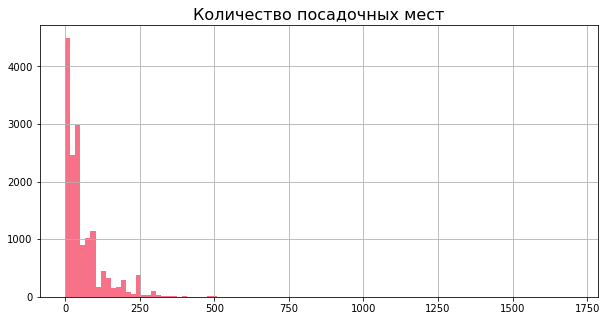

In [20]:
df['number'].hist(bins=100, range = (0, 1700), figsize = (10,5))
plt.title("Количество посадочных мест", fontsize=16)
plt.show()

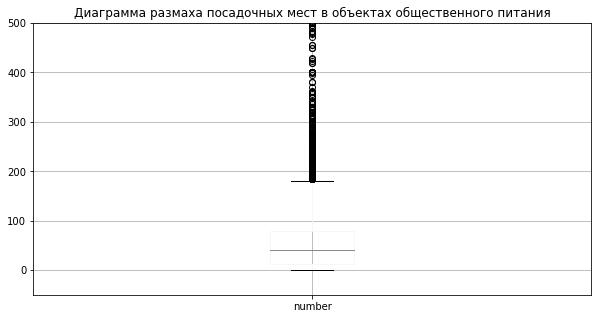

In [21]:
plt.figure(
    figsize=(10, 5)
)
plt.ylim(0, 1700)
df.boxplot(column='number', figsize = (8,5))
plt.ylim(-50, 500)
plt.title("Диаграмма размаха посадочных мест в объектах общественного питания", fontsize=12)
plt.show()

Исходя из графика можно сделать вывод, что большинство объектов общественного питания содержит от 12 до 80 посадочных мест. Эти показатели найдены исходя из расчета значений первого и третьего квартиля соответственно. Все объекты с вместительностью больше 250 посадочных мест либо уникальны, и расположены в крупных торговых и развлекательных объектах, либо имеют место ошибки в заполнении. Рассмотрим некоторые объекты.

In [22]:
df.sort_values(by='number',ascending=False).head(20)

,id,object_name,chain,object_type,address,number
12723,199696,Arena by Soho Family,False,бар,"город Москва, Кутузовский проспект, дом 36, строение 11",1700
8148,80291,Банкетный зал Шелк,False,ресторан,"город Москва, Большой Саввинский переулок, дом 12, строение 10Г",1500
8345,27750,СТОЛОВАЯ-БУФЕТ,False,столовая,"город Москва, улица Волхонка, дом 15",1400
9064,19719,КОМБИНАТ ПИТАНИЯ «УПРАВЛЕНИЕ АКАДЕМСЕРВИС»,False,столовая,"город Москва, проспект Вернадского, дом 84, строение 1",1288
4480,27024,РУМ СЕРВИС,False,ресторан,"город Москва, Кутузовский проспект, дом 2/1, строение 1",1200
3686,27026,РУМ СЕРВИС,False,ресторан,"город Москва, площадь Европы, дом 2",1200
2313,26560,Ресторан «АЛЬФА»,False,ресторан,"город Москва, Измайловское шоссе, дом 71, корпус А",1040
9955,171116,EATALY,False,ресторан,"город Москва, Киевская улица, дом 2",920
5649,29232,СТОЛОВАЯ МОСКОВСКИЙ ГУМАНИТАРНЫЙ УНИВЕРСИТЕТ,False,столовая,"город Москва, улица Юности, дом 5, строение 1",760
13299,200905,White Hall,False,ресторан,"город Москва, Ферганская улица, дом 8",700


In [23]:
df.query('number < 12')

,id,object_name,chain,object_type,address,number
6,148815,Брусника,True,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
10,148595,Пекарня 24,False,закусочная,"город Москва, Авиамоторная улица, дом 47",5
16,144107,Суши Wok,True,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 3",7
17,154654,Донер Кебаб,False,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 4",2
24,125608,Кафетерий,False,кафетерий,"город Москва, Алтуфьевское шоссе, дом 56",6
...,...,...,...,...,...,...
15337,208477,Милти,True,предприятие быстрого обслуживания,"город Москва, 3-й Крутицкий переулок, дом 18",0
15338,211201,Милти,True,магазин (отдел кулинарии),"город Москва, Новослободская улица, дом 4",0
15343,211767,Бар Мята Lounge,True,бар,"город Москва, Митинская улица, дом 16",5
15362,209264,Шоколадница,True,кафе,"город Москва, улица Земляной Вал, дом 33",10


In [24]:
df_large = df.query('number > 250').pivot_table(index='object_type', values='id', aggfunc ='count').reset_index()
df_large = df_large.sort_values(by='id', ascending=False)
df_large

,object_type,id
5,столовая,164
4,ресторан,93
2,кафе,17
1,буфет,5
3,предприятие быстрого обслуживания,4
0,бар,3


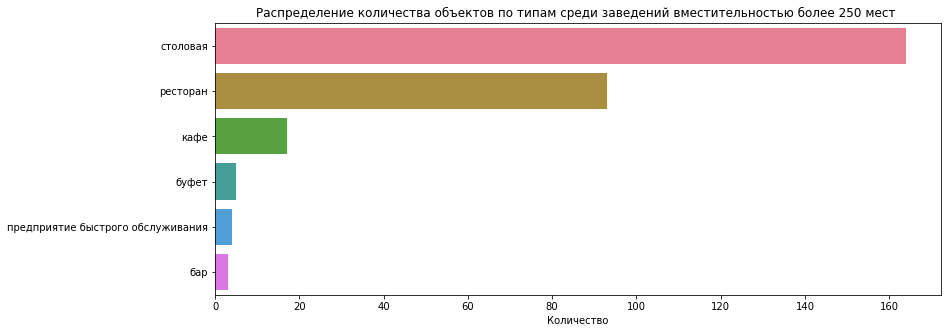

In [25]:
plt.figure(
    figsize=(13, 5)
)
(
    sns.countplot(y='object_type',
              data=df.query('number > 250'),
              order=df_large['object_type'].unique())
)
plt.title("Распределение количества объектов по типам среди заведений вместительностью более 250 мест ", fontsize=12)
plt.xlabel('Количество')
plt.ylabel('')
plt.show()

In [26]:
df_small = df.query('number < 12').pivot_table(index='object_type', values='id', aggfunc ='count').reset_index()
df_small = df_small.sort_values(by='id', ascending=False)
df_small

,object_type,id
3,кафе,1221
6,предприятие быстрого обслуживания,1176
4,кафетерий,297
2,закусочная,289
5,магазин (отдел кулинарии),225
0,бар,131
1,буфет,125
7,ресторан,78
8,столовая,44


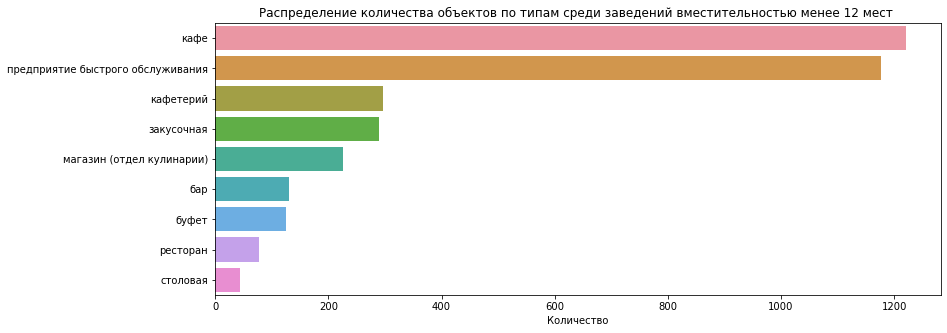

In [27]:
plt.figure(
    figsize=(13, 5)
)
(sns.countplot(y='object_type',
              data=df.query('number < 12'),
              order=df_small['object_type'].unique())
)
plt.title("Распределение количества объектов по типам среди заведений вместительностью менее 12 мест ", fontsize=12)
plt.xlabel('Количество')
plt.ylabel('')
plt.show()

Достаточно много заведений общественного питания с числом посадочных мест менее 12 и более 250. Рассмотрев эти объекты можно предположить, что данные правдоподобны. Для небольшого числа посадочных мест  характерен тип объекта - кафе, предприятие быстрого обслуживания. Для аномально высокого числа посадочных мест характерен тип - столовая, ресторан. Ресторан с самой большой вместимостью Arena by Soho Family имеет 1700 посадочных мест, проверив данный из внешних истоников информации, мы убедились, что данные достоверны.

Мы не будем удалять объекты с артефактными значениями посадочных мест, вместо этого присвоим каждому объекту категорию в соответствии с количеством посадочных мест для дальнейшей работы. Благодаря этому мы сможем сравнивать средние показатели, и выбирать оптимальные значения.

In [28]:
def number_group(row):                    #Возвращает категорию объекта, используя правила:   
        if row['number'] < 12:            # 'Малый' с числом посадочных мест да 12
            return 'Малый'                # 'Средний' с числом посадочных мест от 12 до 250
        if row['number'] < 250:           # 'Крупный' во всех остальных случаях
            return 'Средний'                         
        return 'Крупный'

In [29]:
df['number_group'] = df.apply(number_group, axis = 1)      # применяем функцию к строкам датафрейма

In [30]:
df

,id,object_name,chain,object_type,address,number,number_group
0,151635,СМЕТАНА,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48,Средний
1,77874,Родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,Средний
2,24309,Кафе «Академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95,Средний
3,21894,ПИЦЦЕТОРИЯ,True,кафе,"город Москва, Абрамцевская улица, дом 1",40,Средний
4,119365,Кафе «Вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Средний
...,...,...,...,...,...,...,...
15361,208537,Шоколадница,True,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,Средний
15362,209264,Шоколадница,True,кафе,"город Москва, улица Земляной Вал, дом 33",10,Малый
15363,209186,Шоколадница,True,кафе,"город Москва, улица Земляной Вал, дом 33",20,Средний
15364,221900,Шоколадница,True,кафе,"город Москва, поселение Московский, Киевское шоссе, 22-й километр, домовладение 4, строение 1",36,Средний


### Вывод

Мы изучили базу данных с заведениями общественного питания в Москве.

База данных содержит в себе информацию о таких параметрах, как название, тип объекта, адрес в Москве, количество посадочных мест и информация о том, вляется ли заведение сетевым объектом. Это основные параметры, которые будут необходимы нам для анализа.

Мы провели предобработку данных, убедились в отсутствии пропусков, проверили базу на наличие дубликатов.

Привели все данные к соответствующим типам - категариальные значения к типу `object`, булевы значения к типу `bool`.

Явных и неявных дубликатов не обнаружено.

Числовые значения исследованы, объекты разделены на категории в соответствии с числом посадочных мест. Основная категория на которой следует сделать акцент в исследовании - средняя группа, так как большая часть заведений находится в данной выборке.

## Анализ данных

### Виды объектов общественного питания

Исследуем соотношение видов объектов общественного питания по количеству. Построим график.

In [31]:
df_type_count = df.pivot_table(index='object_type', values='id', aggfunc ='count').reset_index()
df_type_count = df_type_count.sort_values(by='id', ascending=False)
df_type_count

,object_type,id
3,кафе,6099
8,столовая,2587
7,ресторан,2285
6,предприятие быстрого обслуживания,1923
0,бар,856
1,буфет,585
4,кафетерий,398
2,закусочная,360
5,магазин (отдел кулинарии),273


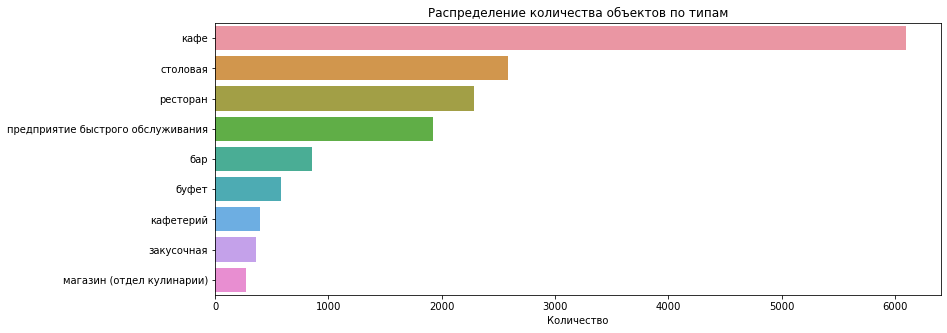

In [32]:
plt.figure(
    figsize=(13, 5)
)
sns.barplot(df_type_count['id'], df_type_count['object_type'])
plt.title("Распределение количества объектов по типам", fontsize=12) 
plt.ylabel('')
plt.xlabel('Количество')
plt.show()

Рассмотрим соотношение по количеству с разбивкой на группы по вместимости заведений.

In [33]:
df.pivot_table(index='object_type', values='id', columns='number_group', aggfunc ='count').reset_index()

number_group,object_type,Крупный,Малый,Средний
0,бар,6.0,131.0,719.0
1,буфет,9.0,125.0,451.0
2,закусочная,NaN,289.0,71.0
3,кафе,23.0,1221.0,4855.0
4,кафетерий,NaN,297.0,101.0
5,магазин (отдел кулинарии),NaN,225.0,48.0
6,предприятие быстрого обслуживания,5.0,1176.0,742.0
7,ресторан,119.0,78.0,2088.0
8,столовая,203.0,44.0,2340.0


In [34]:
df_number_group = (
    df.
    pivot_table(index='object_type', values='id', columns='number_group', aggfunc ='count').
    reset_index().
    fillna(0)
)
df_number_group['total'] = df_number_group['Крупный'] + df_number_group['Малый'] + df_number_group['Средний']
df_number_group = df_number_group.sort_values(by='total', ascending=False)
df_number_group

number_group,object_type,Крупный,Малый,Средний,total
3,кафе,23.0,1221.0,4855.0,6099.0
8,столовая,203.0,44.0,2340.0,2587.0
7,ресторан,119.0,78.0,2088.0,2285.0
6,предприятие быстрого обслуживания,5.0,1176.0,742.0,1923.0
0,бар,6.0,131.0,719.0,856.0
1,буфет,9.0,125.0,451.0,585.0
4,кафетерий,0.0,297.0,101.0,398.0
2,закусочная,0.0,289.0,71.0,360.0
5,магазин (отдел кулинарии),0.0,225.0,48.0,273.0


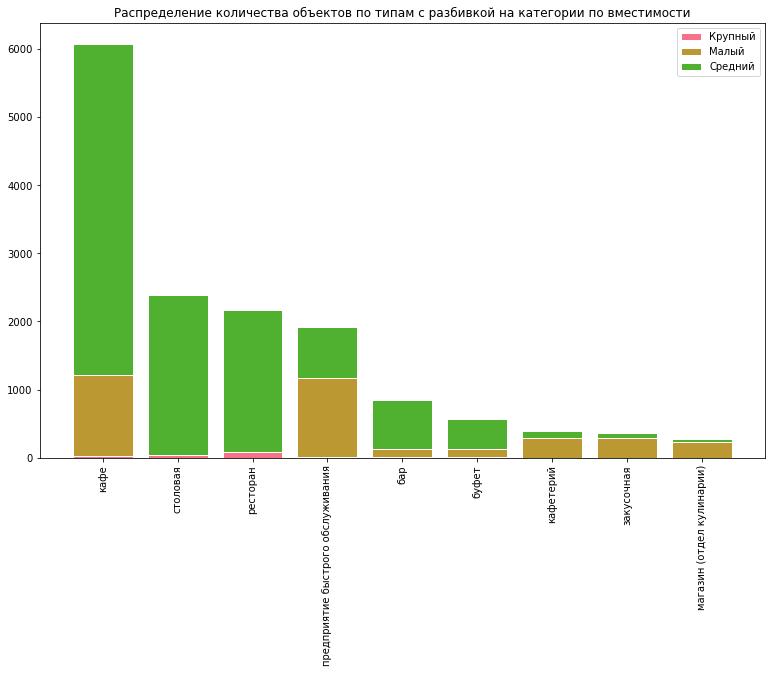

In [35]:
plt.figure(
    figsize=(13, 8)
)
plt.bar(df_number_group['object_type'], df_number_group['Крупный'], label='Крупный', edgecolor='#ffffff')

plt.bar(df_number_group['object_type'], df_number_group['Малый'], bottom=df_number_group['Крупный'],
       label='Малый', edgecolor='#ffffff')
plt.bar(df_number_group['object_type'], df_number_group['Средний'], bottom=df_number_group['Малый'],
       label='Средний', edgecolor='#ffffff')
plt.xticks(rotation=90)
plt.title("Распределение количества объектов по типам с разбивкой на категории по вместимости", fontsize=12)
plt.legend()
plt.show()

Итак мы видим, что в общей массе преобладают объекты типа `кафе`, так же в Москве имеется большое число `столовых`, `ресторанов`, `предприятий быстрого обслуживания`. Если мы посмотрим на данные в разрезе по вместимости заведений, для таких типов как `закусочная`, `предприятие быстрого питания`, `кафетерий`, `магазин` большее число заведений приходится на объекты малой вместимости (до 12 посадочных мест). Для `кафе`, `столовых`, `ресторанов` больше всего заведений со средней вместимостью (от 12 до 250 посадочных мест). Самые вместительные заведения (более 250 мест) являются преимущественно `столовыми` и `ресторанами`.

### Сетевые и несетевые заведения Москвы

Исследуем соотношение сетевых и несетевых заведений по количеству. Построим график.

In [36]:
df['chain'].value_counts()

False    12398
True      2968
Name: chain, dtype: int64

In [37]:
true_chain = df[df['chain'] == True]['chain'].count()                 # найдем количество сетевых и несетевых заведений
false_chain = df[df['chain'] == False]['chain'].count()               # и их долю в общей базе
total_chain = df['chain'].count()                                     
ratio_true_chain = true_chain/total_chain
ratio_false_chain = false_chain/total_chain

In [38]:
print(f'Количество сетевых заведений - {true_chain}')
print(f'Количество несетевых заведений - {false_chain}')
print(f'Доля сетевых заведений в общем количестве составляет {ratio_true_chain:.1%}')
print(f'Доля несетевых заведений в общем количестве составляет {ratio_false_chain:.1%}')

Количество сетевых заведений - 2968
Количество несетевых заведений - 12398
Доля сетевых заведений в общем количестве составляет 19.3%
Доля несетевых заведений в общем количестве составляет 80.7%


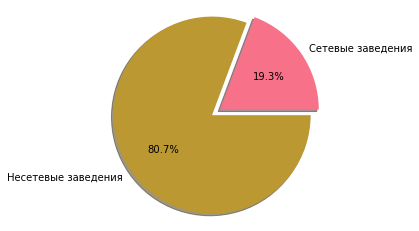

In [39]:
labels = [
    'Сетевые заведения',
    'Несетевые заведения'
]
values = [true_chain, false_chain]
explode = (0.1, 0)
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode)
ax.axis("equal")
plt.show()

In [40]:
df_chain = df.pivot_table(index='object_type', values='id', columns='chain', aggfunc ='count').reset_index()
df_chain.rename(columns = {False:'несетевые',True:'сетевые'}, inplace = True)
df_chain['total'] = df_chain['несетевые'] + df_chain['сетевые']
df_chain = df_chain.sort_values(by='total', ascending=False)
df_chain

chain,object_type,несетевые,сетевые,total
3,кафе,4703,1396,6099
8,столовая,2584,3,2587
7,ресторан,1741,544,2285
6,предприятие быстрого обслуживания,1132,791,1923
0,бар,819,37,856
1,буфет,574,11,585
4,кафетерий,346,52,398
2,закусочная,304,56,360
5,магазин (отдел кулинарии),195,78,273


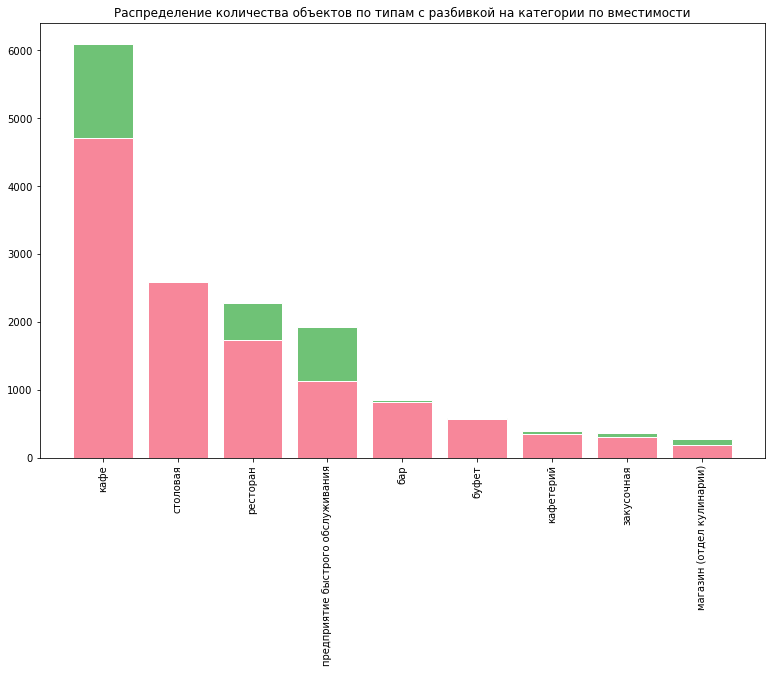

In [41]:
plt.figure(
    figsize=(13, 8)
)
plt.bar(df_chain['object_type'], df_chain['несетевые'], label='несетевые', color='#f7879a',  edgecolor='#ffffff')

plt.bar(df_chain['object_type'], df_chain['сетевые'], bottom=df_chain['несетевые'],
       label='сетевые', color='#6fc276', edgecolor='#ffffff')
plt.xticks(rotation=90)
plt.title("Распределение количества объектов по типам с разбивкой на категории по вместимости", fontsize=12)
plt.show()

In [42]:
def value_ratio_2(type_object):                   
    
    total_chain_2 = df[df['object_type'] == type_object]['chain'].count()
    true_chain_2 = df[df['object_type'] == type_object][df[df['object_type'] == type_object]['chain'] == True]['chain'].count()
    ratio_true_chain_2 = true_chain_2/total_chain_2
    return ratio_true_chain_2

In [43]:
d=[]
for z in df['object_type'].unique():
    d.append({'тип заведения': z, 'доля сетевых': f'{value_ratio_2(z):.1%}', 'v' : value_ratio_2(z)})
pd.DataFrame(d).sort_values(by='v', ascending=False).reset_index(drop=True)[['тип заведения', 'доля сетевых']]

,тип заведения,доля сетевых
0,предприятие быстрого обслуживания,41.1%
1,магазин (отдел кулинарии),28.6%
2,ресторан,23.8%
3,кафе,22.9%
4,закусочная,15.6%
5,кафетерий,13.1%
6,бар,4.3%
7,буфет,1.9%
8,столовая,0.1%


Итак, подавляющее большинство объектов не относится к какой-либо сети заведений общественного питания. Такая тенденция наблюдается для всех типов объектов. Столовых, буфетов, и баров имеющих свои сети практически нет. Доля сетевых заведений в общей базе сотавляет 20 %. Сетевое  распространение характерно для предприятий быстрого обслуживания, магазинов, ресторанов и кафе. Доли таких предприятий в общей базе в соответствии с типом составляют 41, 29, 24 и 23 % соответственно. 

### Влияние размера сети общественного питания на среднюю вместительность заведения

Изучим что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест.

In [44]:
df_true_chain = df.query('chain == True') # сохраним в переменную выборку сетевых заведений

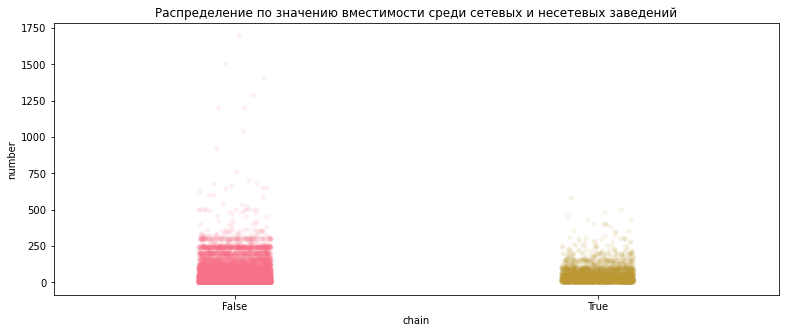

In [45]:
plt.figure(
    figsize=(13, 5)
)
sns.stripplot(x='chain', y='number', data=df, alpha = 0.1)
plt.title("Распределение по значению вместимости среди сетевых и несетевых заведений", fontsize=12)
plt.show()

<Figure size 936x360 with 0 Axes>

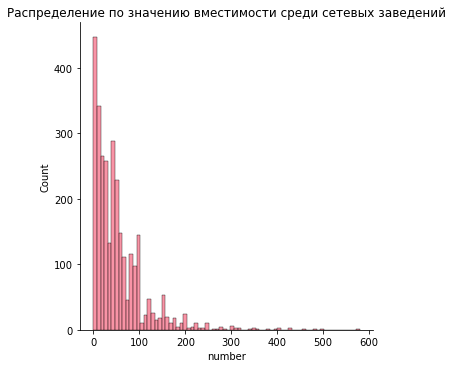

In [46]:
plt.figure(
    figsize=(13, 5)
)
sns.displot(x='number', data=df_true_chain);
plt.title("Распределение по значению вместимости среди сетевых заведений", fontsize=12)
plt.show()

Для сетевых заведений характерно много объектов с небольшим числом посадочных мест в каждом и мало заведений с большим количеством посадочных мест.

Выделим сети, выделим категории по размеру сети и найдем среднее число посадочных мест для каждой категории.

In [47]:
df_chain_true = df.query('chain == True')

In [48]:
df_chain_true1 = df_chain_true.pivot_table(index='object_name', values='id', aggfunc ='count').reset_index().sort_values(by='id', ascending=False)
df_chain_true1

,object_name,id
30,KFC,155
702,Шоколадница,141
418,Макдоналдс,122
127,Бургер Кинг,122
195,Домино'с Пицца,86
...,...,...
293,Кафе «Марукамэ»,1
291,Кафе «МЕЛЕНКА»,1
290,Кафе «МАКДОНАЛДС»,1
289,Кафе «Кулинарное бюро»,1


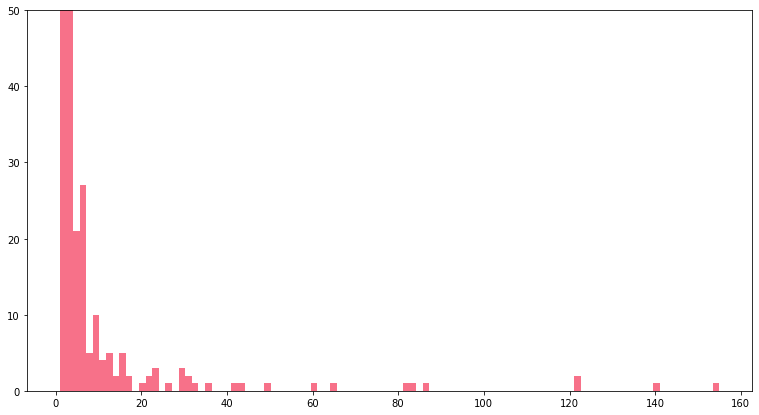

In [49]:
plt.figure(
    figsize=(13, 7)
)
plt.hist(df_chain_true1['id'], bins=100)
plt.ylim([0,50])
plt.show()

In [50]:
def count_group(row):                       
        if row['id'] < 10:            
            return 'A'                
        if row['id'] < 50:           
            return 'B'
        if row['id'] < 100:
            return 'C'
        return 'D'

In [51]:
df_chain_true1['count_group'] = df_chain_true1.apply(count_group, axis = 1) 

In [52]:
df_chain_true1

,object_name,id,count_group
30,KFC,155,D
702,Шоколадница,141,D
418,Макдоналдс,122,D
127,Бургер Кинг,122,D
195,Домино'с Пицца,86,C
...,...,...,...
293,Кафе «Марукамэ»,1,A
291,Кафе «МЕЛЕНКА»,1,A
290,Кафе «МАКДОНАЛДС»,1,A
289,Кафе «Кулинарное бюро»,1,A


In [53]:
df_chain_true = df_chain_true.merge(df_chain_true1[['object_name','count_group']], on='object_name', how='left')

In [54]:
df_chain_true

,id,object_name,chain,object_type,address,number,number_group,count_group
0,21894,ПИЦЦЕТОРИЯ,True,кафе,"город Москва, Абрамцевская улица, дом 1",40,Средний,A
1,148815,Брусника,True,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,Малый,A
2,22579,Алло Пицца,True,кафе,"город Москва, улица Авиаторов, дом 14",32,Средний,B
3,144107,Суши Wok,True,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 3",7,Малый,C
4,58565,Тануки,True,ресторан,"город Москва, Большая Академическая улица, дом 65",160,Средний,B
...,...,...,...,...,...,...,...,...
2963,208537,Шоколадница,True,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,Средний,D
2964,209264,Шоколадница,True,кафе,"город Москва, улица Земляной Вал, дом 33",10,Малый,D
2965,209186,Шоколадница,True,кафе,"город Москва, улица Земляной Вал, дом 33",20,Средний,D
2966,221900,Шоколадница,True,кафе,"город Москва, поселение Московский, Киевское шоссе, 22-й километр, домовладение 4, строение 1",36,Средний,D


In [55]:
(
    df_chain_true.
    pivot_table(index='count_group', values='number', aggfunc ='median').
    reset_index().
    rename(columns = {'count_group': 'группа', 'number':'среднее число посадочных мест'})
)


,группа,среднее число посадочных мест
0,A,45
1,B,40
2,C,12
3,D,50


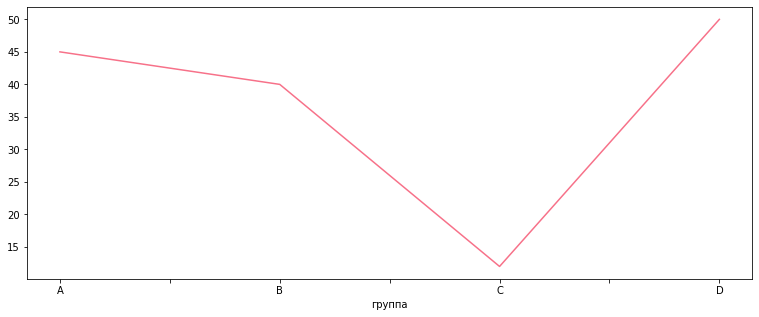

In [56]:
df_chain_true.pivot_table(index='count_group', values='number', aggfunc ='median').plot(figsize=(13,5),legend=False)
plt.xlabel('группа')
plt.show()

In [57]:
df_chain_true.query('count_group == "C"')

,id,object_name,chain,object_type,address,number,number_group,count_group
3,144107,Суши Wok,True,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 3",7,Малый,C
5,81554,Домино'с Пицца,True,кафе,"город Москва, Алтуфьевское шоссе, дом 56",24,Средний,C
7,69243,Суши Wok,True,кафе,"город Москва, проспект Андропова, дом 30",4,Малый,C
14,24973,Теремок,True,кафе,"город Москва, улица Арбат, дом 32",22,Средний,C
22,22804,Домино'с Пицца,True,кафе,"город Москва, Башиловская улица, дом 3, корпус 1",10,Малый,C
...,...,...,...,...,...,...,...,...
2929,210815,Милти,True,предприятие быстрого обслуживания,"город Москва, город Московский, улица Хабарова, дом 2",0,Малый,C
2930,211247,Милти,True,магазин (отдел кулинарии),"город Москва, Святоозерская улица, дом 1А",0,Малый,C
2933,211208,Милти,True,кафе,"город Москва, Дубининская улица, дом 41, строение 2",0,Малый,C
2939,208477,Милти,True,предприятие быстрого обслуживания,"город Москва, 3-й Крутицкий переулок, дом 18",0,Малый,C


In [58]:
df_chain_true.query('count_group == "C"').pivot_table(index='object_name', values='number', aggfunc ='median')

,number
object_name,
Домино'с Пицца,16
Крошка Картошка,15
Милти,0
Папа Джонс,20
Суши Wok,6
Теремок,21


Мы разделили сети по группам в зависимости от количества объектов общественного питания в сети и для каждой группы расчитали среднее число посадочных мест. Исходя из полученных результатов нельзя сделать вывод, что есть прямая зависимость между размером сети и показателем вместительности объектов. В малых сетях где число объектов менее 50 и больших сетях более 100 объектов, вместительность примерно одинакова от 40 до 50 посадочных мест. Для сетей от 50 до 100 объектов среднее число посадочных мест приблизительно в 4 раза меньше. Изучим группу с наименьшей вместительностью, в нее вошли такие крупные сети как `Домино'с Пицца`, `Крошка Картошка`, `Милти`, `Папа Джонс`, `Суши Wok`, `Теремок`

### Исследование вместимости заведений общественного питания по типам объектов

Для каждого вида объекта общественного питания найдем среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Построим графики.

In [59]:
from numpy import median

In [60]:
df_median_number = (
    df.
    pivot_table(index='object_type', values='number', aggfunc ='median').
    reset_index().
    sort_values(by='number', ascending=False)
)
df_median_number

,object_type,number
8,столовая,103
7,ресторан,80
0,бар,35
1,буфет,32
3,кафе,30
4,кафетерий,6
6,предприятие быстрого обслуживания,5
2,закусочная,0
5,магазин (отдел кулинарии),0


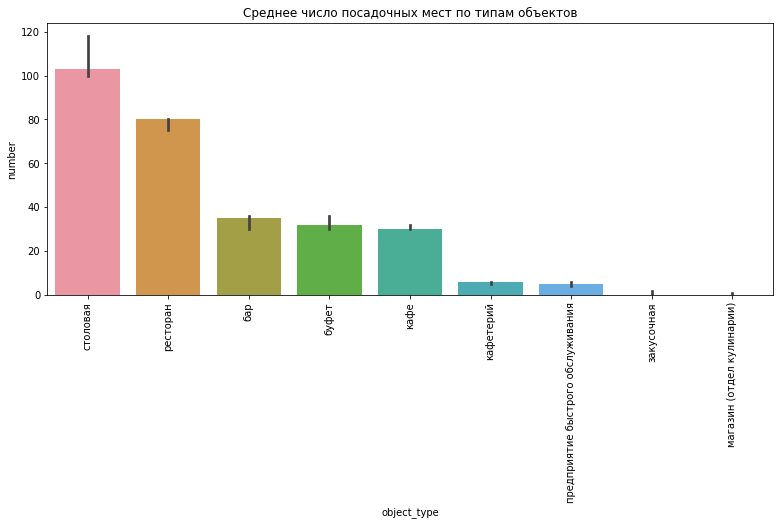

In [61]:
plt.figure(
    figsize=(13, 5)
)
sns.barplot(x='object_type', y='number', data=df, estimator=median, order=df_median_number['object_type'])
plt.xticks(rotation=90)
plt.title("Среднее число посадочных мест по типам объектов", fontsize=12)
plt.show()

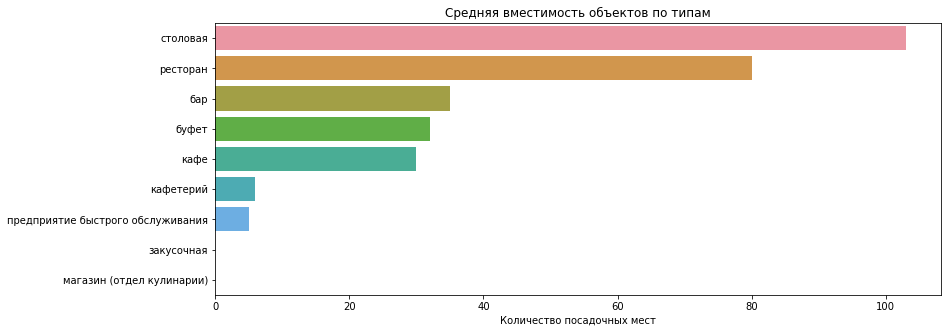

In [62]:
plt.figure(
    figsize=(13, 5)
)
sns.barplot(df_median_number['number'], df_median_number['object_type'])
plt.title("Средняя вместимость объектов по типам", fontsize=12) 
plt.ylabel('')
plt.xlabel('Количество посадочных мест')
plt.show()

In [63]:
df_median_number2 = (
    df.query('number_group == "Средний"').
    pivot_table(index='object_type', values='number', aggfunc ='median').
    reset_index().
    sort_values(by='number', ascending=False)
)
df_median_number2

,object_type,number
8,столовая,100
7,ресторан,80
0,бар,40
1,буфет,40
3,кафе,40
6,предприятие быстрого обслуживания,35
2,закусочная,23
4,кафетерий,20
5,магазин (отдел кулинарии),20


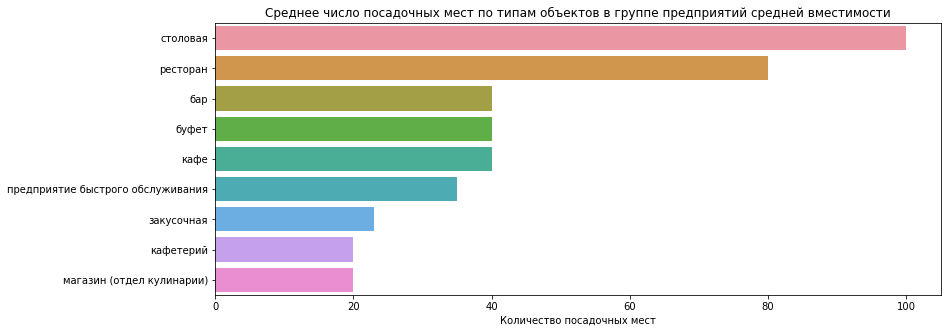

In [64]:
plt.figure(
    figsize=(13, 5)
)
sns.barplot(df_median_number2['number'], df_median_number2['object_type'])
plt.title("Среднее число посадочных мест по типам объектов в группе предприятий средней вместимости", fontsize=12) 
plt.ylabel('')
plt.xlabel('Количество посадочных мест')
plt.show()

In [65]:
(
    df.
    pivot_table(index='object_type', values='number', columns='number_group', aggfunc ='mean').
    reset_index().
    fillna(0).
    round(1)
)

number_group,object_type,Крупный,Малый,Средний
0,бар,497.8,5.5,46.6
1,буфет,277.8,3.1,59.9
2,закусочная,0.0,2.0,30.5
3,кафе,310.0,5.5,47.1
4,кафетерий,0.0,3.8,24.8
5,магазин (отдел кулинарии),0.0,1.8,23.3
6,предприятие быстрого обслуживания,402.0,2.1,47.2
7,ресторан,386.2,3.5,83.8
8,столовая,315.6,4.1,116.5


Столовые и рестораны предоставляют в среднем самое большое количество посадочных мест. При этом ситуация не изменяется, даже если отсеять аномально высокие значения в столбце `number` - то есть, не учитывая уникальные заведения общественного питания, расчитаные на крупные мероприятия (например банкетные залы). 
При исключении из базы крупных и малых предприятий средний показатель вместимости для закусочных, магазинов, предприятий быстрого обслуживания резко возрастает. Это говорит о том, что основная масса заведений данных типов имеет небольшое число посадочных мест (от 0 до 10). Самые мало вместимые - закусочные и магазины (среднее значение посадочных мест близко к 0), а так же кафетерии и предприятия быстрого обслуживания.

###  Топ-10 улиц по количеству объектов общественного питания

Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы?
Выделим в отдельный столбец информацию об улице из столбца `address`.

In [66]:
def get_second_value(s, sep = ','):                          #Функция для выбора второго элемента из перечисления
    
    value_second = s.split(sep=sep)
    return value_second[1]

df['street'] = df['address'].apply(get_second_value)

In [67]:
df['address'].str.split(',').sample()

4022    [город Москва,  Ореховый бульвар,  дом 33]
Name: address, dtype: object

In [68]:
df.head()

,id,object_name,chain,object_type,address,number,number_group,street
0,151635,СМЕТАНА,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48,Средний,улица Егора Абакумова
1,77874,Родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,Средний,улица Талалихина
2,24309,Кафе «Академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95,Средний,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,True,кафе,"город Москва, Абрамцевская улица, дом 1",40,Средний,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Средний,Абрамцевская улица


In [69]:
df['street'] = df['street'].str.strip() # избавимся от лишних пробелов

Создадим таблицу топ-10 улиц по количеству объектов общественного питания. Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы?

In [70]:
df.pivot_table(index='street', values='id', aggfunc='count').sort_values(by='id',ascending=False).head(10)

,id
street,
город Зеленоград,232
проспект Мира,204
Профсоюзная улица,182
Ленинградский проспект,171
Пресненская набережная,167
Варшавское шоссе,161
Ленинский проспект,147
поселение Сосенское,138
проспект Вернадского,132


Так как нас интересуют заведения общественного питания Москвы, исключим из выборки объекты расположенные в городе Зеленоград и поселение Сосенское. Повторим поиск.

In [71]:
(
    df.
    query('street != "город Зеленоград" and street != "поселение Сосенское"').
    pivot_table(index='street', values='id', aggfunc='count').
    sort_values(by='id',ascending=False).
    head(10)
)

,id
street,
проспект Мира,204
Профсоюзная улица,182
Ленинградский проспект,171
Пресненская набережная,167
Варшавское шоссе,161
Ленинский проспект,147
проспект Вернадского,132
Кутузовский проспект,114
Каширское шоссе,112


In [72]:
df_max = (df.                                                                     # сохраним новую таблицу в переменную
    query('street != "город Зеленоград" and street != "поселение Сосенское"').
    pivot_table(index='street', values='id', aggfunc='count').
    sort_values(by='id',ascending=False).
    head(10).reset_index()
         )

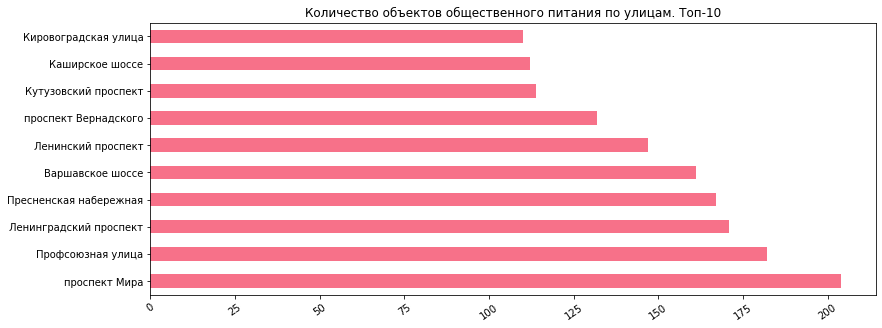

In [73]:
(
    df.                                                                     
    query('street != "город Зеленоград" and street != "поселение Сосенское"').
    pivot_table(index='street', values='id', aggfunc='count').
    sort_values(by='id',ascending=False).
    head(10).
    plot(kind = 'barh', title = 'Количество объектов общественного питания по улицам. Топ-10', figsize = (13,5), legend=False)
         )
plt.xticks(rotation=35)
plt.ylabel('')
plt.show()

In [74]:
df_max

,street,id
0,проспект Мира,204
1,Профсоюзная улица,182
2,Ленинградский проспект,171
3,Пресненская набережная,167
4,Варшавское шоссе,161
5,Ленинский проспект,147
6,проспект Вернадского,132
7,Кутузовский проспект,114
8,Каширское шоссе,112
9,Кировоградская улица,110


In [75]:
df_max = df_max.rename(columns={'id':'count_object'})            # переименуем столбец с количеством заведений

In [76]:
from io import BytesIO
import requests
spreadsheet_id = '1f2N193B61pnhMVMm9sOuKsMNhxHBJO-4'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=xlsx'.format(spreadsheet_id)
r = requests.get(file_name)
df_street = pd.read_excel(BytesIO(r.content))
df_street 

,UM_CODE,UM_NAMEF,UM_NAMES,UM_TRANS,UM_TYPE,UM_TM,UM_TE,UM_KLADR,global_id,UM_CODE_en,UM_NAMEF_en,UM_NAMES_en,UM_TRANS_en,UM_TYPE_en,UM_TM_en,UM_TE_en,UM_KLADR_en
0,Код,Полное наименование,Сокращённое наименование,Транслитерация,Код вида,Код ОМК ТМ,Код ОМК ТЕ,Код КЛАДР,global_id,UM_CODE_en,UM_NAMEF_en,UM_NAMES_en,UM_TRANS_en,UM_TYPE_en,UM_TM_en,UM_TE_en,UM_KLADR_en
1,008880,1-й Ирининский переулок,1-й Ирининский пер.,Pervy'j Irininskij pereulok,002,NaN,0102,77000000000706300,58481065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,008890,2-й Ирининский переулок,2-й Ирининский пер.,Vtoroj Irininskij pereulok,002,NaN,0102,77000000000362200,58481066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,008891,3-й Ирининский переулок,3-й Ирининский пер.,Tretij Irininskij pereulok,002,NaN,0102,77000000000362300,58481067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,008910,Иркутская улица,Иркутская ул.,Irkutskaya ulicza,001,NaN,0406,77000000000139700,58481068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5320,050405,площадь Долматовского,пл. Долматовского,ploshhad` Dolmatovskogo,004,NaN,1101,NaN,1508955123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5321,050410,Гумилёвский бульвар,Гумилёвский б-р,Gumilyovskij bul`var,008,NaN,1101,NaN,1508955129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5322,050415,улица Марины Цветаевой,ул. Марины Цветаевой,ulicza Mariny` Czvetaevoj,001,NaN,1101,NaN,1508955149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5323,050420,улица Василия Аксёнова,ул. Василия Аксёнова,ulicza Vasiliya Aksyonova,001,NaN,1101,NaN,1508955159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
df_street = df_street.rename(columns={'UM_NAMEF':'street'})    # переименуем столбец с названиями улиц для дальнейшего слияния

Итак в данной таблице нас интересует столбец с полным наименованием улицы `UM_NAMEF` и код района `UM_TE`. так как в данной базе нет наименований районов, найдем из внешнего источника базу районов г. Москвы и прочитаем ее.

In [78]:
spreadsheet_id2 = '12nLfD_1hDlsnZFlIH9B9nH_YfaLcThq1'
file_name2 = 'https://docs.google.com/spreadsheets/d/{}/export?format=xlsx'.format(spreadsheet_id2)
r2 = requests.get(file_name2)
df_omk_te = pd.read_excel(BytesIO(r2.content))
df_omk_te 

,Kod,Name,global_id,Latin_name,Type,Kod_okato
0,100,Центральный административный округ,58703558,Czentral`ny'j administrativny'j okrug,2,45286000
1,101,район Арбат,58703559,rajon Arbat,3,45286552
2,102,Басманный район,58703560,Basmanny'j rajon,3,45286555
3,103,район Замоскворечье,58703561,rajon Zamoskvorech`e,3,45286560
4,104,Красносельский район,58703562,Krasnosel`skij rajon,3,45286565
...,...,...,...,...,...,...
153,1206,поселение Новофедоровское,58703712,poselenie Novofedorovskoe,4,45298567
154,1207,поселение Первомайское,58703713,poselenie Pervomajskoe,4,45298572
155,1208,поселение Роговское,58703714,poselenie Rogovskoe,4,45298575
156,1209,поселение Троицк,58703715,poselenie Troiczk,4,45298578


In [79]:
df_max = df_max.merge(df_street.loc[:,('street','UM_TE')], on='street', how='left')

Итак мы нашли к каким районам относятся улицы, на которых расположено максимальное количество заведений общественного питания. Но одна улица может распологаться в разных районах, и к тому же мы имеем только код района, что не информативно. Поэтому наши действия следующие:
* разделим информацию с кодами районов - в каждой строке код района;
* присоединим информацию о наименовании районов из таблицы `df_omk_te`.

In [80]:
df_max['Kod'] = df_max['UM_TE'].str.split(';')

In [81]:
df_max

,street,count_object,UM_TE,Kod
0,проспект Мира,204,0105;0301;0309;0310;0312;0313;0317,"[0105, 0301, 0309, 0310, 0312, 0313, 0317]"
1,Профсоюзная улица,182,0701;0704;0707;0709;0710;0712,"[0701, 0704, 0707, 0709, 0710, 0712]"
2,Ленинградский проспект,171,0201;0202;0214;0217,"[0201, 0202, 0214, 0217]"
3,Пресненская набережная,167,0106,[0106]
4,Варшавское шоссе,161,0610;0613;0615;0619;0620;0621;0708;0711;1111,"[0610, 0613, 0615, 0619, 0620, 0621, 0708, 0711, 1111]"
5,Ленинский проспект,147,0110;0610;0702;0706;0707;0709;0814;0817,"[0110, 0610, 0702, 0706, 0707, 0709, 0814, 0817]"
6,проспект Вернадского,132,0702;0706;0814;0815;0817,"[0702, 0706, 0814, 0815, 0817]"
7,Кутузовский проспект,114,0805;0819,"[0805, 0819]"
8,Каширское шоссе,112,0612;0613;0616;0617,"[0612, 0613, 0616, 0617]"
9,Кировоградская улица,110,0619;0620;0621,"[0619, 0620, 0621]"


In [82]:
df_max = df_max.explode('Kod').reset_index(drop = True)

In [83]:
df_max

,street,count_object,UM_TE,Kod
0,проспект Мира,204,0105;0301;0309;0310;0312;0313;0317,0105
1,проспект Мира,204,0105;0301;0309;0310;0312;0313;0317,0301
2,проспект Мира,204,0105;0301;0309;0310;0312;0313;0317,0309
3,проспект Мира,204,0105;0301;0309;0310;0312;0313;0317,0310
4,проспект Мира,204,0105;0301;0309;0310;0312;0313;0317,0312
5,проспект Мира,204,0105;0301;0309;0310;0312;0313;0317,0313
6,проспект Мира,204,0105;0301;0309;0310;0312;0313;0317,0317
7,Профсоюзная улица,182,0701;0704;0707;0709;0710;0712,0701
8,Профсоюзная улица,182,0701;0704;0707;0709;0710;0712,0704
9,Профсоюзная улица,182,0701;0704;0707;0709;0710;0712,0707


In [84]:
df_omk_te['Kod'] = df_omk_te['Kod'].astype(str)
df_max['Kod'] = df_max['Kod'].astype(str)

In [85]:
df_omk_te['Kod'] = df_omk_te['Kod'].str.strip()
df_max['Kod'] = df_max['Kod'].str.strip()

In [86]:
df_max['Kod'] = df_max['Kod'].str.replace("0", "", 1)     #заменим первый ноль в коде района, чтобы объединить таблицы

In [87]:
df_max = df_max.merge(df_omk_te.loc[:,('Kod','Name')], on='Kod', how='left')   # объединим таблицы

In [88]:
df_max.head(10)

,street,count_object,UM_TE,Kod,Name
0,проспект Мира,204,0105;0301;0309;0310;0312;0313;0317,105,Мещанский район
1,проспект Мира,204,0105;0301;0309;0310;0312;0313;0317,301,Алексеевский район
2,проспект Мира,204,0105;0301;0309;0310;0312;0313;0317,309,район Марьина Роща
3,проспект Мира,204,0105;0301;0309;0310;0312;0313;0317,310,Останкинский район
4,проспект Мира,204,0105;0301;0309;0310;0312;0313;0317,312,район Ростокино
5,проспект Мира,204,0105;0301;0309;0310;0312;0313;0317,313,район Свиблово
6,проспект Мира,204,0105;0301;0309;0310;0312;0313;0317,317,Ярославский район
7,Профсоюзная улица,182,0701;0704;0707;0709;0710;0712,701,Академический район
8,Профсоюзная улица,182,0701;0704;0707;0709;0710;0712,704,район Коньково
9,Профсоюзная улица,182,0701;0704;0707;0709;0710;0712,707,Обручевский район


In [89]:
df_max = df_max.loc[:,('street','Name', 'count_object')]               # выделим из таблицы нужные нам столбцы

In [90]:
funcs = {c:'first' for c in df_max.drop(['street', 'Name'],1).columns} # создадим переменную, которая содержит словарь
                                                                       # с названием столбца к значениям в которых нужно
                                                                       # применить функцию first

In [91]:
funcs['Name'] = lambda x: x.values.tolist()                            # к столбцу `Name` применим функцию

In [92]:
df_max = df_max.groupby('street', as_index=False).agg(funcs)           # сделаем группировку по названию улицы

In [93]:
df_max.sort_values(by='count_object', ascending=False).reset_index(drop=True) # окончательная таблица с улицами и районами

,street,count_object,Name
0,проспект Мира,204,"[Мещанский район, Алексеевский район, район Марьина Роща, Останкинский район, район Ростокино, район Свиблово, Ярославский район]"
1,Профсоюзная улица,182,"[Академический район, район Коньково, Обручевский район, район Тёплый Стан, район Черёмушки, район Ясенево]"
2,Ленинградский проспект,171,"[район Аэропорт, район Беговой, район Сокол, Хорошёвский район]"
3,Пресненская набережная,167,[Пресненский район]
4,Варшавское шоссе,161,"[Донской район, район Нагатино-Садовники, Нагорный район, район Чертаново Северное, район Чертаново Центральное, район Чертаново Южное, район Северное Бутово, район Южное Бутово, поселение Щербинка]"
5,Ленинский проспект,147,"[район Якиманка, Донской район, Гагаринский район, Ломоносовский район, Обручевский район, район Тёплый Стан, район Проспект Вернадского, район Тропарёво-Никулино]"
6,проспект Вернадского,132,"[Гагаринский район, Ломоносовский район, район Проспект Вернадского, район Раменки, район Тропарёво-Никулино]"
7,Кутузовский проспект,114,"[район Дорогомилово, район Фили-Давыдково]"
8,Каширское шоссе,112,"[район Москворечье-Сабурово, район Нагатино-Садовники, район Орехово-Борисово Северное, район Орехово-Борисово Южное]"
9,Кировоградская улица,110,"[район Чертаново Северное, район Чертаново Центральное, район Чертаново Южное]"


Итак мы получили таблицу с названиями улиц в которых расположено самое большое число заведений общественного питания по всей Москве. Но так как сами улицы достаточно протяженные, они охватывают большое число районов Москвы. Все райны расположения указанных улиц содежатся в столбце `Name` в таблице выше.

Найдем улицы с одним объектом общественного питания, посчитаем их количество, и найдем в каких районах они расположены.

In [94]:
df_1 = (df.                                                                  # сгруппируем улицы по количеству заведений
        pivot_table(index='street', values='id', aggfunc='count').
        sort_values(by='id',ascending=True)
       )

In [95]:
df_1 = df_1.query('id == 1').reset_index()                                   # выберем улицы, где расположен только один объект

In [96]:
df_1 = df_1.merge(df_street.loc[:,('street','UM_TE')], on='street', how='left')    # объединис таблицы

In [97]:
df_1

,street,id,UM_TE
0,Новопресненский переулок,1,0106
1,Вяземская улица,1,0809;0820
2,улица Раевского,1,0805
3,Таёжная улица,1,0307
4,Газгольдерная улица,1,0510
...,...,...,...
618,80-й километр Московской Кольцевой Автодороги,1,0208
619,6-й Лучевой просек,1,0418
620,6-я улица Лазенки,1,0811
621,8-я улица Соколиной Горы,1,0408;0417


In [98]:
df_1['Kod'] = df_1['UM_TE'].str.split(';')                                     # разделим список кодов районов в столбце

In [99]:
df_1 = df_1.explode('Kod').reset_index(drop = True)                            # разделим на строки

In [100]:
df_1['Kod'] = df_1['Kod'].str.replace("0", "", 1)                              # удалим первый 0 в коде района для слияния

In [101]:
df_1 = df_1.merge(df_omk_te.loc[:,('Kod','Name')], on='Kod', how='left')       # объединим таблицы

In [102]:
df_1 = df_1.loc[:,('street','Name')]
df_1

,street,Name
0,Новопресненский переулок,Пресненский район
1,Вяземская улица,Можайский район
2,Вяземская улица,район Очаково-Матвеевское
3,улица Раевского,район Дорогомилово
4,Таёжная улица,Лосиноостровский район
...,...,...
663,6-й Лучевой просек,район Сокольники
664,6-я улица Лазенки,район Ново-Переделкино
665,8-я улица Соколиной Горы,район Измайлово
666,8-я улица Соколиной Горы,район Соколиная Гора


Перечислим уникальные значения столбца `Name`, чтобы узнать в каких районах распологаются улицы, на которых есть только один объект общественного питания. 

In [103]:
df_1['Name'].unique()

array(['Пресненский район', 'Можайский район',
       'район Очаково-Матвеевское', 'район Дорогомилово',
       'Лосиноостровский район', 'Нижегородский район',
       'район Выхино-Жулебино', 'район Ясенево', 'район Соколиная Гора',
       'район Аэропорт', 'Таганский район', 'район Арбат',
       'район Хамовники', 'район Богородское', 'Мещанский район',
       'Тверской район', 'район Лефортово', nan,
       'район Нагатино-Садовники', 'район Свиблово', 'район Раменки',
       'Красносельский район', 'Бутырский район', 'район Митино',
       'район Люблино', 'Тимирязевский район',
       'район Покровское-Стрешнево', 'Басманный район',
       'район Новогиреево', 'район Перово', 'Даниловский район',
       'Алтуфьевский район', 'район Замоскворечье', 'Алексеевский район',
       'район Якиманка', 'Головинский район', 'район Щукино',
       'район Внуково', 'район Марьина Роща', 'район Чертаново Северное',
       'район Сокольники', 'район Котловка', 'район Южное Бутово',
       'Дми

In [104]:
func = {'street':lambda x: x.values.tolist()}

In [105]:
df_1_group = df_1.groupby('Name', as_index=False).agg(func)

In [106]:
df_1_group.head(10)

,Name,street
0,Алексеевский район,"[Староалексеевская улица, Кучин переулок, Кулаков переулок, Рижский проезд, Зубарев переулок, улица Константинова, 1-й Рижский переулок]"
1,Алтуфьевский район,[Стандартная улица]
2,Бабушкинский район,"[Чукотский проезд, Олонецкий проезд, Радужная улица, улица Рудневой, Печорская улица]"
3,Басманный район,"[Гольяновская улица, Спартаковский переулок, Госпитальный переулок, Большой Казённый переулок, Большой Полуярославский переулок, Малый Казённый переулок, Хитровский переулок, Хохловский переулок, Большой Трёхсвятительский переулок, Лефортовский переулок, Мрузовский переулок, Малый Златоустинский переулок, Малый Ивановский переулок, Елоховский проезд, Кондрашёвский тупик, Рубцов переулок, Сверчков переулок, Петроверигский переулок, Плетешковский переулок, Посланников переулок, Подсосенский пе..."
4,Бескудниковский район,"[Бескудниковский проезд, Бескудниковский переулок]"
5,Бутырский район,"[улица Фонвизина, улица Гончарова, проезд Добролюбова]"
6,Войковский район,"[Нарвская улица, 2-й Новоподмосковный переулок]"
7,Гагаринский район,[Молодёжная улица]
8,Головинский район,"[Солнечногорский проезд, Нарвская улица, Пулковская улица, Конаковский проезд, 3-й Лихачёвский переулок]"
9,Даниловский район,"[Городская улица, Хавская улица, Малая Тульская улица, Жуков проезд, улица Сайкина, 4-й Рощинский проезд, 4-й Кожевнический переулок, 3-й Павловский переулок, 1-й Кожевнический переулок, 1-й Кожуховский проезд, улица Павла Андреева, 5-й Рощинский проезд]"


Итак выше укзаны районы Москвы, в которых расположены улицы, имеющие по одному объекту общественного питания. Улицы перечислены в столбце `street` таблицы выше. 

In [107]:
(
    df_1.groupby(by=['Name']).
    count().
    sort_values(by='street', ascending=False).
    head(10).
    reset_index().rename(columns={'street':'количество улиц с одним объектом'}).
    merge(df_1_group, on='Name', how='left').
    rename(columns={'Name':'район','street':'улицы'})
)

,район,количество улиц с одним объектом,улицы
0,Таганский район,28,"[Гжельский переулок, Тихий тупик, Тетеринский переулок, Тессинский переулок, Гончарная набережная, Средняя Калитниковская улица, Стройковская улица, Яузский бульвар, Большой Полуярославский переулок, Большой Симоновский переулок, Брошевский переулок, Костомаровская набережная, Малый Полуярославский переулок, Малая Андроньевская улица, Лыщиков переулок, Международная улица, Известковый переулок, Сибирский проезд, Пестовский переулок, 2-я Дубровская улица, улица Высоцкого, 1-й Котельнический п..."
1,район Хамовники,26,"[Глазовский переулок, Соймоновский проезд, Денежный переулок, Большой Знаменский переулок, Большой Афанасьевский переулок, Хилков переулок, Бутиковский переулок, Несвижский переулок, Кремлёвская набережная, Малый Саввинский переулок, Малый Лёвшинский переулок, Малый Власьевский переулок, Малый Знаменский переулок, Мансуровский переулок, Лужнецкий проезд, Кооперативная улица, Сеченовский переулок, Пуговишников переулок, улица Савельева, Пожарский переулок, 2-й Неопалимовский переулок, 2-й Обы..."
2,Басманный район,25,"[Гольяновская улица, Спартаковский переулок, Госпитальный переулок, Большой Казённый переулок, Большой Полуярославский переулок, Малый Казённый переулок, Хитровский переулок, Хохловский переулок, Большой Трёхсвятительский переулок, Лефортовский переулок, Мрузовский переулок, Малый Златоустинский переулок, Малый Ивановский переулок, Елоховский проезд, Кондрашёвский тупик, Рубцов переулок, Сверчков переулок, Петроверигский переулок, Плетешковский переулок, Посланников переулок, Подсосенский пе..."
3,Тверской район,20,"[Глинищевский переулок, улица Фадеева, Успенский переулок, Триумфальная площадь, Тихвинский переулок, Воротниковский переулок, Дмитровский переулок, Дегтярный переулок, Делегатская улица, Никитский переулок, Мамоновский переулок, Малый Путинковский переулок, Миусская площадь, Козицкий переулок, улица Достоевского, 2-й Щемиловский переулок, 2-й Колобовский переулок, 1-я Миусская улица, Богоявленский переулок, Малый Каретный переулок]"
4,Пресненский район,19,"[Новопресненский переулок, Тестовская улица, Средний Кондратьевский переулок, Гранатный переулок, Стрельбищенский переулок, Столовый переулок, Большой Предтеченский переулок, Электрический переулок, улица Подвойского, Хлыновский тупик, Хлебный переулок, Скатертный переулок, Красногвардейский бульвар, Малый Конюшковский переулок, Мерзляковский переулок, Причальный проезд, улица Николаева, переулок Красина, улица Анатолия Живова]"
5,район Марьина Роща,18,"[Старомарьинское шоссе, Стрелецкая улица, улица Советской Армии, Минаевский переулок, Институтский переулок, улица Достоевского, 2-я Ямская улица, 2-й Стрелецкий проезд, 2-я улица Марьиной Рощи, 3-й Стрелецкий проезд, 1-й проезд Марьиной Рощи, 12-й проезд Марьиной Рощи, 17-й проезд Марьиной Рощи, 2-й Вышеславцев переулок, Анненская улица, Анненский проезд, 5-й проезд Марьиной Рощи, 8-й проезд Марьиной Рощи]"
6,район Арбат,17,"[Глазовский переулок, Троилинский переулок, Денежный переулок, Большой Знаменский переулок, Большой Николопесковский переулок, Большой Афанасьевский переулок, Хлебный переулок, Филипповский переулок, Шубинский переулок, Скатертный переулок, Кривоарбатский переулок, Малый Николопесковский переулок, Мерзляковский переулок, Композиторская улица, Проточный переулок, Калошин переулок, 1-й Николощеповский переулок]"
7,Мещанский район,16,"[Глинистый переулок, Выползов переулок, Большой Кисельный переулок, Варсонофьевский переулок, Ботанический переулок, Нижний Кисельный переулок, Напрудный переулок, улица Советской Армии, Малая Переяславская улица, Звонарский переулок, Садовая-Сухаревская улица, улица Достоевского, 1-й Коптельский переулок, Банный проезд, Больничный переулок, переулок Васнецова]"
8,район Сокольники,15,"[Стромынский переулок, Старослободская улица, Большая Ширяевская улица, Русаковская набережная, Попов проезд, улица Жебрунова, 2-я Сокольническая улица, 2-й Лучевой просек, 2-й Полевой переу

Итак, мы вывели топ 10 районов по количеству улиц, на которых расположено только одно заведение общественного питания. 

Найдем районы Москвы с самым большим числом ресторанов и кафе.

In [108]:
df_full = (df.
           query('object_type in ["кафе","ресторан"]').
           pivot_table(index='street', values='id', aggfunc='count').
           sort_values(by='id',ascending=False)
          )

In [109]:
df_full = df_full.reset_index()

In [110]:
df_full = df_full.merge(df_street.loc[:,('street','UM_TE')], on='street', how='left')

In [111]:
df_full.head(10)

,street,id,UM_TE
0,Пресненская набережная,138,0106
1,проспект Мира,135,0105;0301;0309;0310;0312;0313;0317
2,Профсоюзная улица,121,0701;0704;0707;0709;0710;0712
3,Ленинградский проспект,118,0201;0202;0214;0217
4,поселение Сосенское,107,NaN
5,Ленинский проспект,101,0110;0610;0702;0706;0707;0709;0814;0817
6,Кутузовский проспект,89,0805;0819
7,Ходынский бульвар,87,0217
8,город Зеленоград,83,NaN
9,проспект Вернадского,75,0702;0706;0814;0815;0817


In [112]:
df_full['Kod'] = df_full['UM_TE'].str.split(';')

In [113]:
df_full = df_full.explode('Kod').reset_index(drop = True)

In [114]:
df_full['Kod'] = df_full['Kod'].str.replace("0", "", 1)

In [115]:
df_full = df_full.merge(df_omk_te.loc[:,('Kod','Name')], on='Kod', how='left')

In [116]:
df_full.head(10)

,street,id,UM_TE,Kod,Name
0,Пресненская набережная,138,0106,106,Пресненский район
1,проспект Мира,135,0105;0301;0309;0310;0312;0313;0317,105,Мещанский район
2,проспект Мира,135,0105;0301;0309;0310;0312;0313;0317,301,Алексеевский район
3,проспект Мира,135,0105;0301;0309;0310;0312;0313;0317,309,район Марьина Роща
4,проспект Мира,135,0105;0301;0309;0310;0312;0313;0317,310,Останкинский район
5,проспект Мира,135,0105;0301;0309;0310;0312;0313;0317,312,район Ростокино
6,проспект Мира,135,0105;0301;0309;0310;0312;0313;0317,313,район Свиблово
7,проспект Мира,135,0105;0301;0309;0310;0312;0313;0317,317,Ярославский район
8,Профсоюзная улица,121,0701;0704;0707;0709;0710;0712,701,Академический район
9,Профсоюзная улица,121,0701;0704;0707;0709;0710;0712,704,район Коньково


In [117]:
df_full = df_full.pivot_table(values='id', index='Name', aggfunc='sum').reset_index()

In [118]:
(
    df_full.
    sort_values(by='id', ascending=False).
    head(10).
    merge(df_1_group, on='Name', how='left').
    rename(columns={'Name':'популярные районы','id':'количество ресторанов и кафе','street':'улицы с одним объектом'})
)

,популярные районы,количество ресторанов и кафе,улицы с одним объектом
0,Тверской район,852,"[Глинищевский переулок, улица Фадеева, Успенский переулок, Триумфальная площадь, Тихвинский переулок, Воротниковский переулок, Дмитровский переулок, Дегтярный переулок, Делегатская улица, Никитский переулок, Мамоновский переулок, Малый Путинковский переулок, Миусская площадь, Козицкий переулок, улица Достоевского, 2-й Щемиловский переулок, 2-й Колобовский переулок, 1-я Миусская улица, Богоявленский переулок, Малый Каретный переулок]"
1,Пресненский район,630,"[Новопресненский переулок, Тестовская улица, Средний Кондратьевский переулок, Гранатный переулок, Стрельбищенский переулок, Столовый переулок, Большой Предтеченский переулок, Электрический переулок, улица Подвойского, Хлыновский тупик, Хлебный переулок, Скатертный переулок, Красногвардейский бульвар, Малый Конюшковский переулок, Мерзляковский переулок, Причальный проезд, улица Николаева, переулок Красина, улица Анатолия Живова]"
2,Мещанский район,552,"[Глинистый переулок, Выползов переулок, Большой Кисельный переулок, Варсонофьевский переулок, Ботанический переулок, Нижний Кисельный переулок, Напрудный переулок, улица Советской Армии, Малая Переяславская улица, Звонарский переулок, Садовая-Сухаревская улица, улица Достоевского, 1-й Коптельский переулок, Банный проезд, Больничный переулок, переулок Васнецова]"
3,Басманный район,478,"[Гольяновская улица, Спартаковский переулок, Госпитальный переулок, Большой Казённый переулок, Большой Полуярославский переулок, Малый Казённый переулок, Хитровский переулок, Хохловский переулок, Большой Трёхсвятительский переулок, Лефортовский переулок, Мрузовский переулок, Малый Златоустинский переулок, Малый Ивановский переулок, Елоховский проезд, Кондрашёвский тупик, Рубцов переулок, Сверчков переулок, Петроверигский переулок, Плетешковский переулок, Посланников переулок, Подсосенский пе..."
4,Даниловский район,386,"[Городская улица, Хавская улица, Малая Тульская улица, Жуков проезд, улица Сайкина, 4-й Рощинский проезд, 4-й Кожевнический переулок, 3-й Павловский переулок, 1-й Кожевнический переулок, 1-й Кожуховский проезд, улица Павла Андреева, 5-й Рощинский проезд]"
5,район Якиманка,358,"[Софийская набережная, Сосновая аллея, Старомонетный переулок, Якиманский переулок, Хавская улица, Бродников переулок, Малый Толмачёвский переулок, Пыжёвский переулок, 3-й Кадашёвский переулок, 1-й Спасоналивковский переулок, 1-й Голутвинский переулок, 2-й Кадашёвский переулок, улица Академика Петровского]"
6,район Замоскворечье,342,"[Средний Овчинниковский переулок, Черниговский переулок, Малый Татарский переулок, Жуков проезд, Садовнический проезд, Кожевнический проезд, Большой Строченовский переулок, 2-й Новокузнецкий переулок, 1-й Люсиновский переулок, 1-й Монетчиковский переулок, 1-й Новокузнецкий переулок, улица Малая Ордынка, улица Павла Андреева, 5-й Монетчиковский переулок]"
7,Донской район,335,"[Хавская улица, Малая Тульская улица, Канатчиковский проезд, 2-й Рощинский проезд, 2-й Верхний Михайловский проезд, улица Академика Петровского]"
8,Обручевский район,334,[улица Академика Опарина]
9,район Хамовники,334,"[Глазовский переулок, Соймоновский проезд, Денежный переулок, Большой Знаменский переулок, Большой Афанасьевский переулок, Хилков переулок, Бутиковский переулок, Несвижский переулок, Кремлёвская набережная, Малый Саввинский переулок, Малый Лёвшинский переулок, Малый Власьевский переулок, Малый Знаменский переулок, Мансуровский переулок, Лужнецкий проезд, Кооперативная улица, Сеченовский переулок, Пуговишников переулок, улица Савельева, Пожарский переулок, 2-й Неопалимовский переулок, 2-й Обы..."


Мы нашли 10 районов Москвы, где чаще встречаются рестораны и кафе. Район самый богатый на такие заведений, как рестораны и кафе - это Тверской район. Не удивительно, ведь он находится в самом центре Москвы, и среди потенциальных клиентов у таких заведений много туристов.

Сформулируем общий вывод и оформим рекомендации о типе заведения, количестве посадочных мест, а также районе расположения для нового объекта общественного питания с оригинальным подходом к обслуживанию.

## Общий вывод

Итак, проведя исследование рынка заведений общественного питания в г. Москва, мы выяснили, что:
* в базе данных содержится информация о заведениях следующих типов - бар, буфет, закусочная, кафе, кафетерий, магазин (кулинария), предприятие быстрого обслуживания, ресторан, столовая;
* преобладающим типом по количеству заведений является кафе, так же в Москве имеется большое число столовых, и ресторанов, предприятий быстрого обслуживания;
* для таких типов заведений как закусочная, предприятия быстрого обслуживания, кафетерий и магазин  большее число заведений - объекты малой вместимости;
* самые вместительные заведения - столовые и рестораны;
* на сети приходится 20 % от всех заведений города;
* чаще всего сети встречаются среди предприятий быстрого обслуживания (41%), так же сетевыми могут быть магазины, рестораны и кафе (29, 24 и 23% соответственно);
* для сетевых заведений характерно небольшое число посадочных мест;
* максимальную вместительность имеют столовые и рестораны (среднее число посадочных мест около 100 и 80 соответственно);
* минимальное число посадочных мест имеют закусочные и магазины, их среднее значение приближается к 0.


Учитывая то, что проект дорогостоящий, следует рассматривать открытие заведения с большим числом посадочных мест. Столовые в данном случае можно исключить, так как они больше нацелены на самообслуживание, и не предполагают включение в чеки наценок за оригинальную подачу и исполнение. Остается рассматривать рестораны и кафе. Кафе - самый популярный тип заведения в Москве. При выборе формата нового заведения нужно учитывать скорость и качество обслуживания роботами. Так как средний чек в кафе, как правило, на порядок ниже среднего чека в ресторане, необходимо изучить спобна ли роботизированная система обслуживания обеспечить непрерывный процесс для обеспечения окупаемости проекта. Поэтому рекомендуемый формат открытия нового заведения с уникальным обслуживанием - ресторан. Среднее число посадочных мест в ресторане - 80, что можно рассматривать как ориентир, при открытии нового заведения. Большая часть ресторанов встречается в Тверском, Пресненском, Мещанском и Басманном районах. Расположены они в самом центре города, поэтому можно ожидать большой поток клиентов, приезжающих в Москву с туристическими целями. Для ресторанов не является характерным сетевое распространение, хотя каждый четвертый ресторан принадлежит к какой-либо сети. Поэтому возможность развития сети, целесообразно изучить после открытиия первого заведения и анализа финансовых показателей его деятельности.

Презентация: https://drive.google.com/file/d/1oLdVIN2k07GQA1H9HWDHqNxn2TcLyuzJ/view?usp=sharing